# **DESAFIO 03c - AC1**

# **Classificação de Atividades Humanas com Redes Neurais**

Na AP1 trabalhamos com uma base com uma grande quantidade de dados. Vamos agora trabalhar com uma base em um outro ponto do espectro, contendo mais de 550 variáveis!

## **O problema**

O objetivo é construir e treinar uma Rede Neural Artificial para classificar com alta precisão a atividade física que uma pessoa está realizando com base nos dados brutos de sensores de um smartphone (acelerômetro e giroscópio).

**Pontos de atenção:**

  * **Alta Dimensionalidade:** o conjunto de dados possui muitas variáveis, o que aumenta consideravelmente o risco de overfitting. Um modelo simples não conseguirá aprender os padrões relevantes e normalmente apresentará um desempenho ruim em dados não vistos.
  * **Sutileza dos Padrões:** as diferenças entre os sinais dos sensores para atividades como "Sentado" (***SITTING***) e "Parado" (***STANDING***) são muito sutis, exigindo que a rede aprenda representações complexas e não-lineares.
  * **Mantenham a cardinalidade da variável alvo:** nesta tarefa vocês não podem agregar classes da variável alvo, ou seja, deverao manter o problema com cardinalidade igual a seis.

## **O Conjunto de Dados**

Utilizaremos o dataset [
***"Human Activity Recognition Using Smartphones"***](https://archive.ics.uci.edu/dataset/240/human+activity+recognition+using+smartphones). Dados e informações podem ser encontrados no link.

O dataset já está dividido em conjuntos de treino e teste e todos devem respeitar esta divisão. As seis classes (atividades) da variável alvo a serem classificadas são:

1.  WALKING
2.  WALKING\_UPSTAIRS
3.  WALKING\_DOWNSTAIRS
4.  SITTING
5.  STANDING
6.  LAYING


## **TAREFA**

Deverá ser utilizada uma rede MLP para prever uma das seis classes (atividades) da variável alvo.

O grupo deverá fazer todas es etapas necessárias tanto na avaliação dos dados disponíveis quanto na preparação necessária para execução do modelo. Todas as etapas devem ser documentadas e as escolhas justificadas.

A performance do modelo deverá ser avaliada por métricas e curvas, ROC e/ou Precision-Recall, de acordo com a necessidade.

Novamente os grupos apresentarão seus esforços a partir do próprio Colab, que deverá estar bem organizado e bem documentado, incluindo as principais escolhas, desafios encontrados e resultados.  

A apresentação dos grupos será feita em sala, no dia 09/10/2025. Cada apresentação deverá durar por volta de 15 minutos e a entrega dos Colabs será feita no próprio dia da apresentação, por e-mail.

Este desafio comporá uma parte da AC, valendo até 0,5 pontos da AC (25%).

Para contextualizar: O UCI HAR Dataset (Human Activity Recognition Using Smartphones Dataset) é um conjunto de dados amplamente utilizado na área de reconhecimento de atividades humanas com ML. Ele foi desenvolvido por pesquisadores do Departamento de Ciência da Computação da Universidade de Genova, Itália, em colaboração com o Centro de Machine Learning da Universidade da Califórnia, Irvine (UCI) — daí o nome UCI HAR.

O objetivo do dataset é permitir o treinamento e avaliação de algoritmos capazes de reconhecer 6 atividades humanas com base em dados coletados de sensores de smartphones:
  - caminhar
  - subir escadas
  - descer escadas
  - sentar
  - ficar de pé
  - deitar

Como os dados foram coletados?
Os dados foram obtidos por meio de smartphones Samsung Galaxy S II com sensores embutidos:
  - Acelerômetro (medindo aceleração nos eixos X, Y e Z)
  - Giroscópio (medindo velocidade angular)

In [ ]:
# 1. Instalação e importação de bibliotecas
# Bibliotecas principais
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import precision_recall_curve, average_precision_score

# Deep Learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Configurações
sns.set(style='whitegrid')

In [ ]:
# 2. Download e carregamento dos dados
# Baixar e descompactar o dataset
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip
!unzip -q "UCI HAR Dataset.zip"

--2025-10-09 22:13:18--  https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘UCI HAR Dataset.zip’

UCI HAR Dataset.zip     [             <=>    ]  58.17M  15.5MB/s    in 4.8s    

2025-10-09 22:13:24 (12.2 MB/s) - ‘UCI HAR Dataset.zip’ saved [60999314]



In [ ]:
# 3. Carregando os dados de treino e teste
# Caminhos dos arquivos
train_data_path = 'UCI HAR Dataset/train/X_train.txt'
train_labels_path = 'UCI HAR Dataset/train/y_train.txt'
test_data_path = 'UCI HAR Dataset/test/X_test.txt'
test_labels_path = 'UCI HAR Dataset/test/y_test.txt'
features_path = 'UCI HAR Dataset/features.txt'
activity_labels_path = 'UCI HAR Dataset/activity_labels.txt'

# Lendo os dados
X_train = pd.read_csv(train_data_path, delim_whitespace=True, header=None)
y_train = pd.read_csv(train_labels_path, delim_whitespace=True, header=None)
X_test = pd.read_csv(test_data_path, delim_whitespace=True, header=None)
y_test = pd.read_csv(test_labels_path, delim_whitespace=True, header=None)

# Lendo os nomes das variáveis e labels
features = pd.read_csv(features_path, delim_whitespace=True, header=None)[1].tolist()
activity_labels = pd.read_csv(activity_labels_path, delim_whitespace=True, header=None, index_col=0)[1].to_dict()

# Nomeando colunas
X_train.columns = features
X_test.columns = features

# Mapeando y
y_train = y_train[0].map(activity_labels)
y_test = y_test[0].map(activity_labels)

# Verificando valores ausentes
print("\nValores ausentes no X_train:")
display(X_train.isnull().sum().sum())

print("\nValores ausentes no X_test:")
display(X_test.isnull().sum().sum())

print("\nValores ausentes no y_train:")
display(y_train.isnull().sum())

print("\nValores ausentes no y_test:")
display(y_test.isnull().sum())

#Sem valores ausentes

/tmp/ipython-input-3290204074.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv(train_data_path, delim_whitespace=True, header=None)
/tmp/ipython-input-3290204074.py:12: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_train = pd.read_csv(train_labels_path, delim_whitespace=True, header=None)
/tmp/ipython-input-3290204074.py:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_test = pd.read_csv(test_data_path, delim_whitespace=True, header=None)



Valores ausentes no X_train:


/tmp/ipython-input-3290204074.py:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_test = pd.read_csv(test_labels_path, delim_whitespace=True, header=None)
/tmp/ipython-input-3290204074.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  features = pd.read_csv(features_path, delim_whitespace=True, header=None)[1].tolist()
/tmp/ipython-input-3290204074.py:18: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  activity_labels = pd.read_csv(activity_labels_path, delim_whitespace=True, header=None, index_col=0)[1].to_dict()


np.int64(0)


Valores ausentes no X_test:


np.int64(0)


Valores ausentes no y_train:


np.int64(0)


Valores ausentes no y_test:


np.int64(0)

/tmp/ipython-input-2989140719.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=y_train, order=y_train.value_counts().index, palette='viridis')


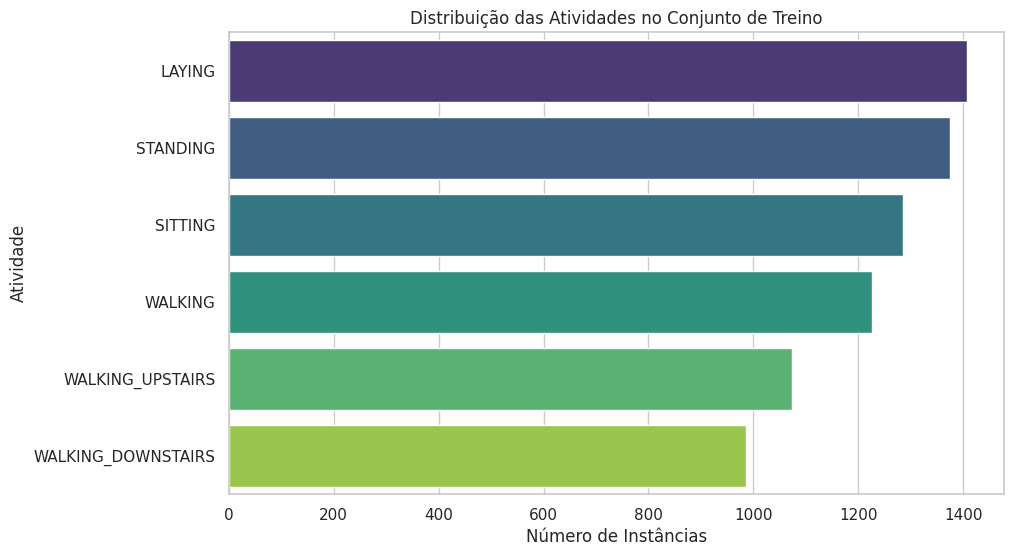


Contagem de instâncias por atividade no conjunto de treino:


,count
0,
LAYING,1407
STANDING,1374
SITTING,1286
WALKING,1226
WALKING_UPSTAIRS,1073
WALKING_DOWNSTAIRS,986


In [ ]:
# 4.Verificando o balanceamento dos dados de treino (y_train)
plt.figure(figsize=(10, 6))
sns.countplot(y=y_train, order=y_train.value_counts().index, palette='viridis')
plt.title('Distribuição das Atividades no Conjunto de Treino')
plt.xlabel('Número de Instâncias')
plt.ylabel('Atividade')
plt.show()

print("\nContagem de instâncias por atividade no conjunto de treino:")
display(y_train.value_counts())

In [ ]:
# 4. Análise e pré-processamento
# Verificando os dados
print("Shape X_train:", X_train.shape)
print("Shape X_test :", X_test.shape)

# Convertendo labels para one-hot
lb = LabelBinarizer()
y_train_ohe = lb.fit_transform(y_train)
y_test_ohe = lb.transform(y_test)

# Verificando as classes
print("Classes:", lb.classes_)

Shape X_train: (7352, 561)
Shape X_test : (2947, 561)
Classes: ['LAYING' 'SITTING' 'STANDING' 'WALKING' 'WALKING_DOWNSTAIRS'
 'WALKING_UPSTAIRS']


- O problema é de classificação multiclasse com 6 classes distintas de atividades humanas, por isso optamos em utilizar o one-hot encoding. O modelo precisa prever uma entre seis atividades a partir de 561 features contínuas.
- Compatível com a saída da nossa função de ativação softmax.
- Facilita a análise com métricas multiclasse:
  - Com as classes binarizadas, conseguimos calcular métricas como:
    - Curvas ROC e Precision–Recall
    - AUC por classe


In [ ]:
# 5. Construção do modelo MLP
# Arquitetura MLP
model = Sequential([
    Dense(256, input_shape=(561,), activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')  # 6 classes
])

# Compilação
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Resumo do modelo
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       143,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 177,542 (693.52 KB)

 Trainable params: 177,542 (693.52 KB)

 Non-trainable params: 0 (0.00 B)

Por que escolhemos essa estrutura de rede MLP ?
- Alta dimensionalidade:
  - No input temos 561 variáveis.
- Camadas com 256 e 128 neurônios pra capturar relações não lineares entre os dados.
- Uma rede rasa (com menos neurônios) poderia subaproveitar o potencial do modelo.
- Dropout para evitar overfitting:
  - Como o dataset tem muitas features, há um certo risco de overfitting. Então o uso de Dropout (0.5) nas duas camadas ocultas ajuda a forçar a rede a generalizar melhor.
- Otimizador Adam:
  - É o otimizador mais utilizado em tarefas de classificação com MLP.
    - Optamos por utilizar o Adam porque ele combina as vantagens de outros otimizadores as vantagens do SGD, Momentum e RMSProp, portanto é o mais "completo" nesse sentido.
  - Ajusta a taxa de aprendizado para cada parâmetro.
  - Acelera o treinamento, e geralmente converge mais rapidamente do que outros métodos.
  - Evita ficar preso em mínimos locais.


In [ ]:
# 6. Treinamento
# Treinando a rede
history = model.fit(X_train, y_train_ohe, epochs=30, batch_size=128, validation_split=0.2, verbose=1)

Epoch 1/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.9673 - loss: 0.0881 - val_accuracy: 0.9572 - val_loss: 0.1280
Epoch 2/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9738 - loss: 0.0705 - val_accuracy: 0.9538 - val_loss: 0.1396
Epoch 3/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9665 - loss: 0.0841 - val_accuracy: 0.9565 - val_loss: 0.1172
Epoch 4/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9710 - loss: 0.0756 - val_accuracy: 0.9517 - val_loss: 0.1191
Epoch 5/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9713 - loss: 0.0764 - val_accuracy: 0.9579 - val_loss: 0.1152
Epoch 6/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9781 - loss: 0.0650 - val_accuracy: 0.9545 - val_loss: 0.1449
Epoch 7/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9754 - loss: 0.0693 - val_accuracy: 0.9511 - val_loss: 0.1060
Epoch 8/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9682 - loss: 0.0738 - val_accuracy: 0.9585 - val_loss

In [ ]:
# 7. Avaliação do modelo
# Avaliação em teste
test_loss, test_acc = model.evaluate(X_test, y_test_ohe, verbose=0)
print(f"\nAccuracy no conjunto de teste: {test_acc:.4f}")



Accuracy no conjunto de teste: 0.9427


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Classification Report:

                    precision    recall  f1-score   support

            LAYING       1.00      0.98      0.99       537
           SITTING       0.93      0.89      0.91       491
          STANDING       0.89      0.94      0.91       532
           WALKING       0.93      0.98      0.95       496
WALKING_DOWNSTAIRS       0.97      0.95      0.96       420
  WALKING_UPSTAIRS       0.95      0.91      0.93       471

          accuracy                           0.94      2947
         macro avg       0.94      0.94      0.94      2947
      weighted avg       0.94      0.94      0.94      2947



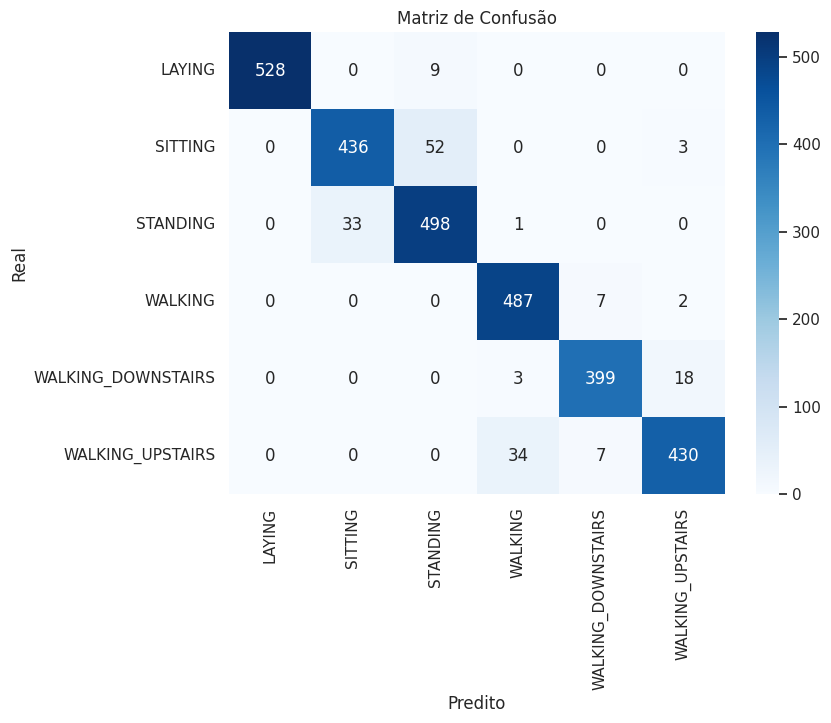

In [ ]:
# 8. Relatório de classificação e matriz de confusão
# Previsões
y_pred_prob = model.predict(X_test)
y_pred = lb.inverse_transform(y_pred_prob)

# Métricas
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred, labels=lb.classes_)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=lb.classes_, yticklabels=lb.classes_)
plt.title("Matriz de Confusão")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()


- O modelo classifica corretamente a grande maioria das instâncias.
- Classes com maior acerto (melhor desempenho):
  - LAYING: 528 corretos, apenas 9 confundidos com STANDING.
  - STANDING: 498 corretos, com alguma confusão com SITTING (33).
  - WALKING: 487 corretos, poucas confusões (7 com WALKING_DOWNSTAIRS e 2 com WALKING_UPSTAIRS).

- Principais confusões:
  - SITTING vs STANDING:
    - 52 instâncias de SITTING foram classificadas como STANDING.
    - 33 de STANDING foram classificadas como SITTING.
  Isso indica que o modelo tem dificuldade em diferenciar essas duas classes, provavelmente porque as características entre estar sentado e em pé são parecidas nos dados.

  - WALKING_UPSTAIRS vs STANDING:
    - 34 instâncias de WALKING_UPSTAIRS foram confundidas com STANDING.
  Pode indicar que há padrões semelhantes entre subir escadas e estar em pé em determinadas posturas ou pausas.
  - WALKING_DOWNSTAIRS vs WALKING_UPSTAIRS:
    - 18 instâncias de WALKING_DOWNSTAIRS foram confundidas com WALKING_UPSTAIRS.
  
  Isso pode acontecer por similaridade nos padrões de aceleração e movimentação vertical nas escadas.

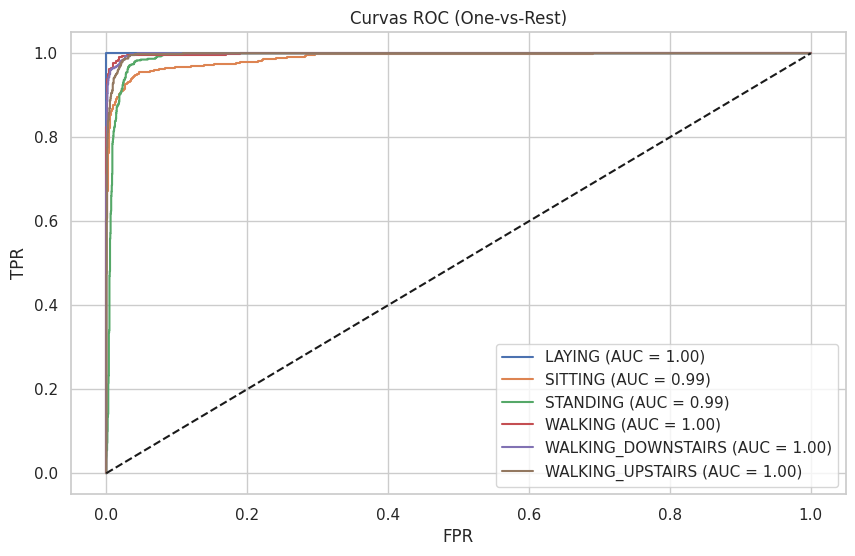

In [ ]:
# 9. Curvas ROC (one-vs-rest)
# Curvas ROC por classe
fpr = dict()
tpr = dict()
roc_auc = dict()

for i, class_name in enumerate(lb.classes_):
    fpr[i], tpr[i], _ = roc_curve(y_test_ohe[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot
plt.figure(figsize=(10, 6))
for i, class_name in enumerate(lb.classes_):
    plt.plot(fpr[i], tpr[i], label=f'{class_name} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('Curvas ROC (One-vs-Rest)')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.grid(True)
plt.show()


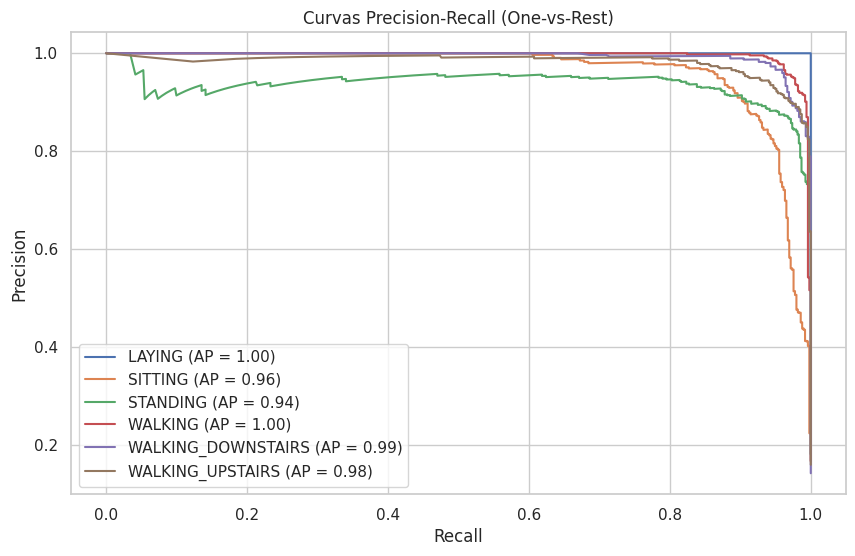

In [ ]:
# 10. Curvas Precision-Recall (One-vs-Rest)
# Curvas Precision-Recall
precision = dict()
recall = dict()
avg_precision = dict()

for i, class_name in enumerate(lb.classes_):
    precision[i], recall[i], _ = precision_recall_curve(y_test_ohe[:, i], y_pred_prob[:, i])
    avg_precision[i] = average_precision_score(y_test_ohe[:, i], y_pred_prob[:, i])

# Plot
plt.figure(figsize=(10, 6))
for i, class_name in enumerate(lb.classes_):
    plt.plot(recall[i], precision[i], label=f'{class_name} (AP = {avg_precision[i]:.2f})')

plt.title('Curvas Precision-Recall (One-vs-Rest)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)
plt.show()
